#  Использование предобученных моделей для классификации изображений

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://pytorch.org/vision/stable/models.html
* https://albumentations.ai/docs/getting_started/image_augmentation/

## Задачи для совместного разбора

1\. Загрузите предобученную модель из `torchvision`. Познакомьтесь с ее архитектурой. Заморозьте веса нескольких слоев.

In [ ]:
from torchvision.models import efficientnet_b1
import torchvision.models as models

In [ ]:
model = efficientnet_b1(weights=models.EfficientNet_B1_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/efficientnet_b1_rwightman-bac287d4.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b1_rwightman-bac287d4.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 104MB/s]


In [ ]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
import torch as th

imgs = th.randint(0, 255, size=(16, 3, 500, 500)).float()

In [ ]:
t = models.EfficientNet_B1_Weights.IMAGENET1K_V1.transforms()
t

ImageClassification(
    crop_size=[240]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [ ]:
imgs_t = t(imgs)
imgs_t.shape

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([16, 3, 240, 240])

In [ ]:
y = model(imgs_t)

In [ ]:
y.shape

torch.Size([16, 1000])

In [ ]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [ ]:
import torch.nn as nn
n_classes = 13
model.classifier = nn.Linear(in_features=1280, out_features=n_classes)

In [ ]:
model.classifier

Linear(in_features=1280, out_features=13, bias=True)

In [ ]:
for name, param in model.named_parameters():
  print(name)
  print(param.requires_grad)
  param.requires_grad_(False)
  print(param.requires_grad)
  break

features.0.0.weight
True
False


## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя реализацию из `torchvision`, cоздайте модель `vgg16` и загрузите предобученные веса `IMAGENET1K_V1`. Выведите на экран структуру модели, количество слоев и количество настраиваемых (`requires_grad==True`) параметров модели.

- [ ] Проверено на семинаре

In [ ]:
from torchvision.models import vgg16
import torchvision.models as models
import torch as th

In [ ]:
model = vgg16(weights='IMAGENET1K_V1')
model

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 65.3MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
n_lays = 0
for name, child in model.named_children():
  if hasattr(child,'__len__'):
    n_lays += len(child)
  else:
    n_lays += 1

print(f'кол-во слоев = {n_lays}')

кол-во слоев = 39


In [ ]:
n_params = 0
for p in model.parameters():
  if p.requires_grad:
    n_params += p.numel()

print(f'кол-во настраиваемых параметров = {n_params}')

кол-во настраиваемых параметров = 138357544


<p class="task" id="2"></p>

2\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

К обучающему датасету примените следующее преобразование: приведите картинки к размеру 256x256, затем обрежьте по центру с размером 224х224, затем переведите изображения в тензор и нормализуйте значения интенсивности пикселей (`mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`).

К тестовому датасету примените преобразование `VGG16_Weights.IMAGENET1K_V1.transforms`.

- [ ] Проверено на семинаре

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torchvision
from torchvision.datasets import ImageFolder, DatasetFolder
from torchvision.transforms import v2
import torch as th
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms

In [ ]:
CatBreeds = ImageFolder(root='/content/drive/MyDrive/Учеба/DL/04/cat_breeds_4')#, transform=v2.Compose([v2.ToImage(), v2.ToDtype(th.float32, scale=True)]))
print(f'Количество картинок в датасете: {len(CatBreeds)}')
print(f'Количество уникальных классов: {len(CatBreeds.classes)}')

n = len(CatBreeds)
train_size = int(0.8*n)
test_size = n - train_size
train_dataset, test_dataset = random_split(CatBreeds, [train_size, test_size])

Количество картинок в датасете: 4000
Количество уникальных классов: 4


In [ ]:
class MyDataset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

In [ ]:
mean=(0.485, 0.456, 0.406)
std=(0.229, 0.224, 0.225)
transform = v2.Compose([
    v2.Resize((256,256)),
    v2.CenterCrop((224,224)),
    v2.ToTensor(),
    # v2.ToImage(),
    # v2.ToDtype(th.float32, scale=True),
    v2.Normalize(mean, std)
])

train_transformed = MyDataset(
  train_dataset, transform=transform
)

test_transformed = MyDataset(
  test_dataset, transform=torchvision.models.VGG16_Weights.IMAGENET1K_V1.transforms()
)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'transformed')

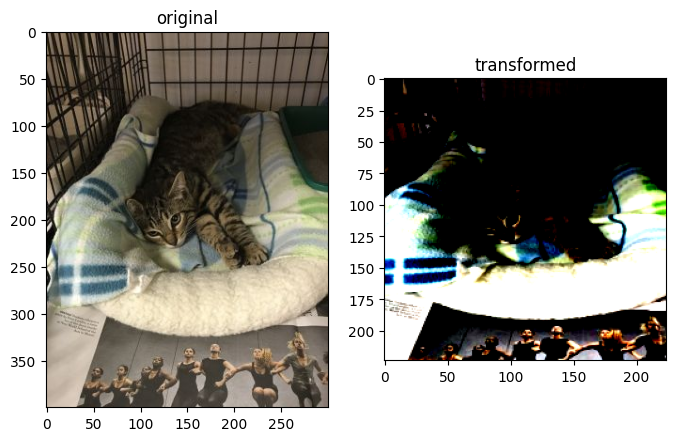

In [ ]:
fig = plt.figure(figsize=(8,5))

fig.add_subplot(1, 2, 1)
plt.imshow(train_dataset[0][0])
plt.title('original')

fig.add_subplot(1, 2, 2)
plt.imshow(train_transformed[0][0].permute(1,2,0))
plt.title('transformed')

Text(0.5, 1.0, 'transformed')

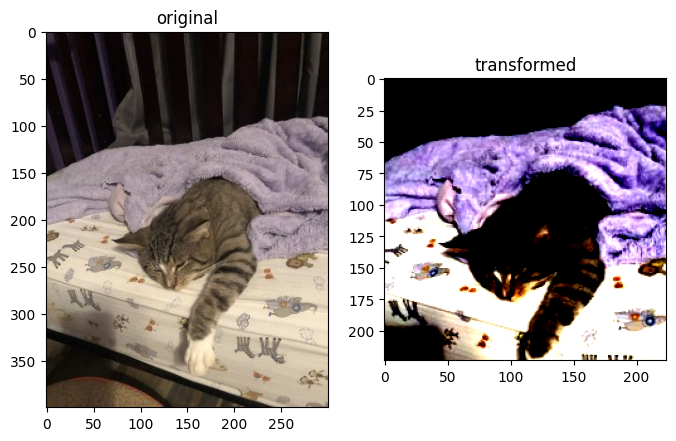

In [ ]:
fig = plt.figure(figsize=(8,5))

fig.add_subplot(1, 2, 1)
plt.imshow(test_dataset[0][0])
plt.title('original')

fig.add_subplot(1, 2, 2)
plt.imshow(test_transformed[0][0].permute(1,2,0))
plt.title('transformed')

<p class="task" id="3"></p>

3\. Заморозьте все веса модели из предыдущего задания. Замените последний слой `Linear` классификатора на новый слой, соответствующий задаче. После изменения последнего слоя выведите на экран количество настраиваемых (`requires_grad==True`) параметров модели. Решите задачу, используя модель с замороженными весами и изменнным последним слоем.

Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве.

- [ ] Проверено на семинаре

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 12.1 MB/s eta 0:00:00


In [ ]:
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import torchmetrics as M

In [ ]:
for name, param in model.named_parameters():
  param.requires_grad_(False)

model.classifier[6] = nn.Linear(in_features=4096, out_features=4)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
n_params = 0
for p in model.parameters():
  if p.requires_grad:
    n_params += p.numel()

print(f'кол-во настраиваемых параметров = {n_params}')

кол-во настраиваемых параметров = 16388


In [ ]:
device = 'cuda' if th.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
n_epochs = 5
lr = 0.001
batch_size = 64
train_loader = DataLoader(train_transformed, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_transformed, batch_size=batch_size, shuffle=False)

# train_loader.to(device)
# test_loader.to(device)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

train_losses = []
train_acc_scores = []
test_acc_scores = []


for epoch in range(n_epochs):
  cnt = 0
  acc_m_train = M.Accuracy(task="multiclass", num_classes=4).to(device)
  cur_loss = 0
  train_loader = DataLoader(train_transformed, batch_size=batch_size, shuffle=True)
  test_loader = DataLoader(test_transformed, batch_size=batch_size, shuffle=True)
  for X_b, y_b in train_loader:
    # print(1)
    cnt += 1
    X_b = X_b.to(device)
    y_b = y_b.to(device)
    y_pred = model(X_b)
    loss = criterion(y_pred, y_b)
    cur_loss += loss.item()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    acc_m_train.update(y_pred.argmax(dim=1), y_b)
    if cnt == 10:
      break

  print(cur_loss)
  train_acc_scores.append(acc_m_train.compute())
  train_losses.append(cur_loss)

  cnt = 0
  acc_m_test = M.Accuracy(task="multiclass", num_classes=4).to(device)
  for X_b, y_b in test_loader:
    cnt += 1
    X_b = X_b.to(device)
    y_b = y_b.to(device)
    y_pred = model(X_b)
    acc_m_test.update(y_pred.argmax(dim=1), y_b)
    if cnt == 5:
      break
  test_acc_scores.append(acc_m_test.compute())

6.15069454908371
6.266868412494659
5.815403997898102
5.427646636962891
6.05496147274971


time: 6min 56s

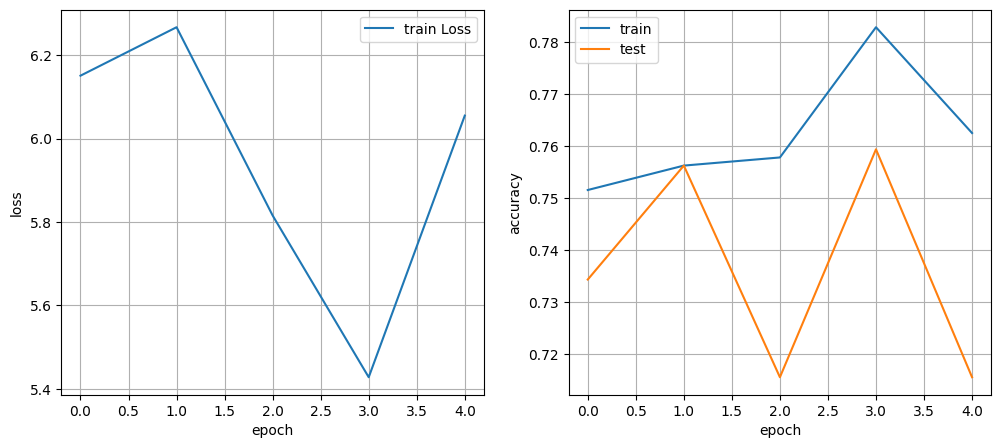

In [ ]:
train_acc_scores = [i.item() for i in train_acc_scores]
test_acc_scores = [i.item() for i in test_acc_scores]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='train Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_acc_scores, label='train')
plt.plot(test_acc_scores, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

In [ ]:
print('Итоговое значение метрики accuracy:')
print(f'- на обучающем множестве = {train_acc_scores[-1]}')
print(f'- на тестовом множестве = {test_acc_scores[-1]}')

Итоговое значение метрики accuracy:
- на обучающем множестве = 0.762499988079071
- на тестовом множестве = 0.715624988079071


<p class="task" id="4"></p>

4\. Повторите решение предыдущей задачи, заморозив все сверточные слои, кроме последнего (слои классификатора не замораживайте). Сравните качество полученного решения и решения из предыдущей задачи, а также время, затраченное на обучения моделей.

- [ ] Проверено на семинаре

In [ ]:
model2 = vgg16(weights='IMAGENET1K_V1')
model2.classifier[6] = nn.Linear(in_features=4096, out_features=4)

for name, child in model2.named_children():
  if name != 'classifier':
    for p in child.parameters():
      p.requires_grad_(False)

model2

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
n_params = 0
for p in model2.parameters():
  if p.requires_grad:
    n_params += p.numel()

print(f'кол-во настраиваемых параметров = {n_params}')

кол-во настраиваемых параметров = 119562244


In [ ]:
n_epochs = 5
lr = 0.001
batch_size = 64

model2.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=lr)

train_losses = []
train_acc_scores = []
test_acc_scores = []


for epoch in range(n_epochs):
  cnt = 0
  acc_m_train = M.Accuracy(task="multiclass", num_classes=4).to(device)
  cur_loss = 0
  train_loader = DataLoader(train_transformed, batch_size=batch_size, shuffle=True)
  test_loader = DataLoader(test_transformed, batch_size=batch_size, shuffle=True)
  for X_b, y_b in train_loader:
    # print(1)
    cnt += 1
    X_b = X_b.to(device)
    y_b = y_b.to(device)
    y_pred = model2(X_b)
    loss = criterion(y_pred, y_b)
    cur_loss += loss.item()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    acc_m_train.update(y_pred.argmax(dim=1), y_b)
    if cnt == 10:
      break

  print(cur_loss)
  train_acc_scores.append(acc_m_train.compute())
  train_losses.append(cur_loss)

  cnt = 0
  acc_m_test = M.Accuracy(task="multiclass", num_classes=4).to(device)
  for X_b, y_b in test_loader:
    cnt += 1
    X_b = X_b.to(device)
    y_b = y_b.to(device)
    y_pred = model2(X_b)
    acc_m_test.update(y_pred.argmax(dim=1), y_b)
    if cnt == 5:
      break
  test_acc_scores.append(acc_m_test.compute())

13.566372036933899
11.208300650119781
7.992762625217438
7.75964891910553
6.864087671041489


time: 2min 28s

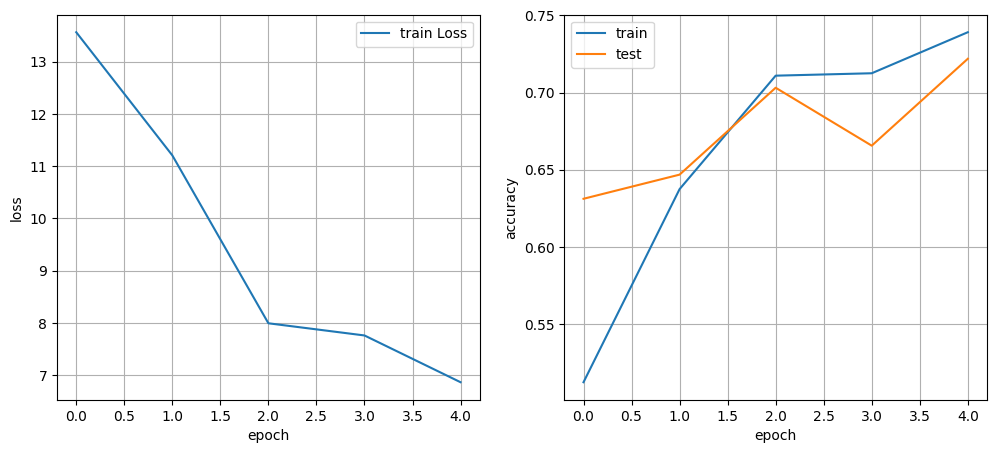

In [ ]:
train_acc_scores = [i.item() for i in train_acc_scores]
test_acc_scores = [i.item() for i in test_acc_scores]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='train Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_acc_scores, label='train')
plt.plot(test_acc_scores, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

In [ ]:
print('Итоговое значение метрики accuracy:')
print(f'- на обучающем множестве = {train_acc_scores[-1]}')
print(f'- на тестовом множестве = {test_acc_scores[-1]}')

Итоговое значение метрики accuracy:
- на обучающем множестве = 0.739062488079071
- на тестовом множестве = 0.721875011920929


model2 обучилась быстрее, качество обеих моделей примерно одинаково

In [ ]:
# n_epochs = 5
# lr = 0.001
# batch_size = 64
# train_loader = DataLoader(train_transformed, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_transformed, batch_size=batch_size, shuffle=False)

# model2.to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model2.parameters(), lr=lr)

# train_losses = []
# train_acc_scores = []
# test_acc_scores = []

# for epoch in range(n_epochs):
#   acc_m_train = M.Accuracy(task="multiclass", num_classes=4)
#   cur_loss = 0
#   for X_b, y_b in train_loader:
#     X_b = X_b.to(device)
#     y_b = y_b.to(device)
#     y_pred = model2(X_b) # batch_size x n_classes
#     loss = criterion(y_pred, y_b)
#     cur_loss += loss.item()
#     loss.backward()
#     optimizer.step()
#     optimizer.zero_grad()
#     acc_m_train.update(y_pred.argmax(dim=1), y_b)

#   train_acc_scores.append(acc_m_train.compute())
#   train_losses.append(cur_loss)

#   acc_m_test = M.Accuracy(task="multiclass", num_classes=4)
#   for X_b, y_b in test_loader:
#     X_b = X_b.to(device)
#     y_b = y_b.to(device)
#     y_pred = model2(X_b)
#     acc_m_test.update(y_pred.argmax(dim=1), y_b)
#   test_acc_scores.append(acc_m_test.compute())

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


CPU times: user 4min 49s, sys: 58.9 s, total: 5min 48s
Wall time: 6min 13s


<p class="task" id="5"></p>

5\. Повторите решение задачи, расширив обучающий набор данных при помощи преобразований из `torchvision`, изменяющих изображение (повороты, изменение интенсивности пикселей, обрезание и т.д.). При оценке модели на тестовой выборке данные преобразования применяться не должны. Решение о том, сколько и каких слоев модели будет обучаться, примите самостоятельно.

- [ ] Проверено на семинаре

In [ ]:
import albumentations as A

In [ ]:
mean=(0.485, 0.456, 0.406)
std=(0.229, 0.224, 0.225)
train_transform_alb = v2.Compose(
    [
        v2.Resize((256,256)),
        v2.CenterCrop((224,224)),
        v2.RandomHorizontalFlip(p=0.5),
        v2.RandomVerticalFlip(p=0.5),
        v2.ToTensor(),
        # v2.ToImage(),
        # v2.ToDtype(th.float32, scale=True),
        v2.Normalize(mean, std),
    ]
)

train_alb = MyDataset(
  train_dataset, transform=train_transform_alb
)

full_dataset = train_alb + train_transformed

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


Text(0.5, 1.0, 'transformed')

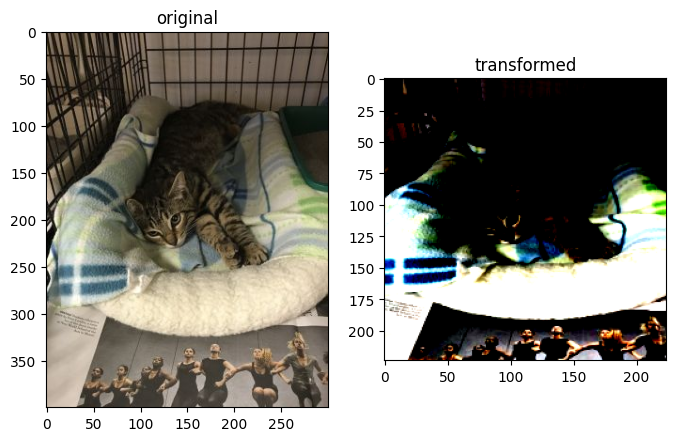

In [ ]:
fig = plt.figure(figsize=(8,5))

fig.add_subplot(1, 2, 1)
plt.imshow(train_dataset[0][0])
plt.title('original')

fig.add_subplot(1, 2, 2)
plt.imshow(train_alb[0][0].permute(1,2,0))
plt.title('transformed')

In [ ]:
model3 = vgg16(weights='IMAGENET1K_V1')
for name, param in model3.named_parameters():
  param.requires_grad_(False)
model3.classifier[6] = nn.Linear(in_features=4096, out_features=4)
model3

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
n_params = 0
for p in model3.parameters():
  if p.requires_grad:
    n_params += p.numel()

print(f'кол-во настраиваемых параметров = {n_params}')

кол-во настраиваемых параметров = 16388


In [ ]:
n_epochs = 5
lr = 0.001
batch_size = 64

model3.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=lr)

train_losses = []
train_acc_scores = []
test_acc_scores = []


for epoch in range(n_epochs):
  cnt = 0
  acc_m_train = M.Accuracy(task="multiclass", num_classes=4).to(device)
  cur_loss = 0
  train_loader = DataLoader(train_transformed, batch_size=batch_size, shuffle=True)
  test_loader = DataLoader(test_transformed, batch_size=batch_size, shuffle=True)
  for X_b, y_b in train_loader:
    # print(1)
    cnt += 1
    X_b = X_b.to(device)
    y_b = y_b.to(device)
    y_pred = model3(X_b)
    loss = criterion(y_pred, y_b)
    cur_loss += loss.item()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    acc_m_train.update(y_pred.argmax(dim=1), y_b)
    if cnt == 10:
      break

  print(cur_loss)
  train_acc_scores.append(acc_m_train.compute())
  train_losses.append(cur_loss)

  cnt = 0
  acc_m_test = M.Accuracy(task="multiclass", num_classes=4).to(device)
  for X_b, y_b in test_loader:
    cnt += 1
    X_b = X_b.to(device)
    y_b = y_b.to(device)
    y_pred = model3(X_b)
    acc_m_test.update(y_pred.argmax(dim=1), y_b)
    if cnt == 5:
      break
  test_acc_scores.append(acc_m_test.compute())

9.886414408683777
6.218115150928497
6.827870011329651
5.708949953317642
5.388273537158966


time: 1min 18s

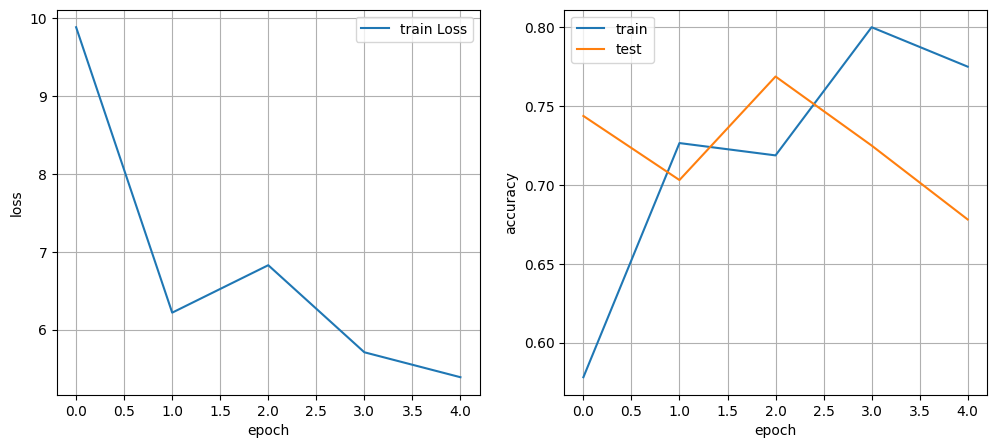

In [ ]:
train_acc_scores = [i.item() for i in train_acc_scores]
test_acc_scores = [i.item() for i in test_acc_scores]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='train Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_acc_scores, label='train')
plt.plot(test_acc_scores, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

In [ ]:
print('Итоговое значение метрики accuracy:')
print(f'- на обучающем множестве = {train_acc_scores[-1]}')
print(f'- на тестовом множестве = {test_acc_scores[-1]}')

Итоговое значение метрики accuracy:
- на обучающем множестве = 0.7749999761581421
- на тестовом множестве = 0.6781250238418579


In [ ]:
# n_epochs = 5
# lr = 0.001
# batch_size = 64
# train_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_transformed, batch_size=batch_size, shuffle=False)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model3.parameters(), lr=lr)

# train_losses = []
# train_acc_scores = []
# test_acc_scores = []

# for epoch in range(n_epochs):
#   acc_m_train = M.Accuracy(task="multiclass", num_classes=4)
#   cur_loss = 0
#   for X_b, y_b in train_loader:
#     y_pred = model3(X_b) # batch_size x n_classes
#     loss = criterion(y_pred, y_b)
#     cur_loss += loss.item()
#     loss.backward()
#     optimizer.step()
#     optimizer.zero_grad()
#     acc_m_train.update(y_pred.argmax(dim=1), y_b)

#   train_acc_scores.append(acc_m_train.compute())
#   train_losses.append(cur_loss)

#   acc_m_test = M.Accuracy(task="multiclass", num_classes=4)
#   for X_b, y_b in test_loader:
#     y_pred = model3(X_b)
#     acc_m_test.update(y_pred.argmax(dim=1), y_b)
#   test_acc_scores.append(acc_m_test.compute())

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


CPU times: user 6min 47s, sys: 49.1 s, total: 7min 36s
Wall time: 7min 45s


Модель обучалась дольше первоначальной
Точность заметно увеличилась

## Обратная связь
- [ ] Хочу получить обратную связь по решению